In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1QtuAY57-FVeMiDHExgYN4-kEgGElQYH-',
dest_path='content/asl_alphabets.zip',
unzip=True)

Unzipping...Done.


In [ ]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set

In [ ]:
import tensorflow as tf
import os
import numpy as np
import tensorflow_datasets as tfds

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPUs Available:  0


IndexError: ignored

In [ ]:

from keras.preprocessing.image import ImageDataGenerator, load_img

# Reading the Data

In [ ]:
df = pd.read_csv("/content/content/asl_alphabets/Training_set.csv")
df.head()

,filename,label
0,Image_1.jpg,B
1,Image_2.jpg,P
2,Image_3.jpg,J
3,Image_4.jpg,T
4,Image_5.jpg,B


In [ ]:
file_path = [[fname, "/content/content/asl_alphabets/train/" + fname ] for fname in df['filename']]

In [ ]:
file_path

[['Image_1.jpg', '/content/content/asl_alphabets/train/Image_1.jpg'],
 ['Image_2.jpg', '/content/content/asl_alphabets/train/Image_2.jpg'],
 ['Image_3.jpg', '/content/content/asl_alphabets/train/Image_3.jpg'],
 ['Image_4.jpg', '/content/content/asl_alphabets/train/Image_4.jpg'],
 ['Image_5.jpg', '/content/content/asl_alphabets/train/Image_5.jpg'],
 ['Image_6.jpg', '/content/content/asl_alphabets/train/Image_6.jpg'],
 ['Image_7.jpg', '/content/content/asl_alphabets/train/Image_7.jpg'],
 ['Image_8.jpg', '/content/content/asl_alphabets/train/Image_8.jpg'],
 ['Image_9.jpg', '/content/content/asl_alphabets/train/Image_9.jpg'],
 ['Image_10.jpg', '/content/content/asl_alphabets/train/Image_10.jpg'],
 ['Image_11.jpg', '/content/content/asl_alphabets/train/Image_11.jpg'],
 ['Image_12.jpg', '/content/content/asl_alphabets/train/Image_12.jpg'],
 ['Image_13.jpg', '/content/content/asl_alphabets/train/Image_13.jpg'],
 ['Image_14.jpg', '/content/content/asl_alphabets/train/Image_14.jpg'],
 ['Image_1

In [ ]:
train_df = pd.DataFrame(file_path,columns=["filename","filepath"])
train_df.head()

,filename,filepath
0,Image_1.jpg,/content/content/asl_alphabets/train/Image_1.jpg
1,Image_2.jpg,/content/content/asl_alphabets/train/Image_2.jpg
2,Image_3.jpg,/content/content/asl_alphabets/train/Image_3.jpg
3,Image_4.jpg,/content/content/asl_alphabets/train/Image_4.jpg
4,Image_5.jpg,/content/content/asl_alphabets/train/Image_5.jpg


In [ ]:
train_df["label"] = df.label

In [ ]:
train_df.head()

,filename,filepath,label
0,Image_1.jpg,/content/content/asl_alphabets/train/Image_1.jpg,B
1,Image_2.jpg,/content/content/asl_alphabets/train/Image_2.jpg,P
2,Image_3.jpg,/content/content/asl_alphabets/train/Image_3.jpg,J
3,Image_4.jpg,/content/content/asl_alphabets/train/Image_4.jpg,T
4,Image_5.jpg,/content/content/asl_alphabets/train/Image_5.jpg,B


In [ ]:
len(train_df.label.unique())

29

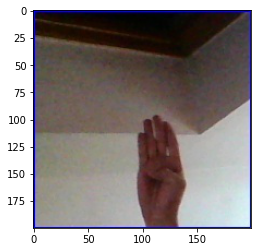

In [ ]:
image = load_img("/content/content/asl_alphabets/train/Image_1.jpg")
plt.imshow(image)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['label'] = le.fit_transform(train_df['label'])

In [ ]:
train_df['label']

0         1
1        15
2         9
3        19
4         1
         ..
60895    18
60896     8
60897    23
60898    16
60899    10
Name: label, Length: 60900, dtype: int64

# Building Model

In [ ]:
width = 175
height = 175
channels = 3

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Dense,Dropout,Flatten

In [ ]:
def create_model():
  model = Sequential()

  model.add(Conv2D(32,(4,4),padding='same',activation='relu',input_shape=(width,height,channels)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(3, 3)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(4,4),padding='same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(3, 3)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128,(4,4),padding='same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(3, 3)))
  model.add(Dropout(0.25))

  # model.add(Conv2D(256,(4,4),padding='same',activation='relu'))
  # model.add(BatchNormalization())
  # model.add(MaxPooling2D(pool_size=(3, 3)))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # model.add(Dense(256,activation='relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  model.add(Dense(128,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(64,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(16,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(29,activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  return model

In [ ]:
model = create_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 175, 175, 32)      1568      
_________________________________________________________________
batch_normalization (BatchNo (None, 175, 175, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 58, 58, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 58, 58, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        32832     
_________________________________________________________________
batch_normalization_1 (Batch (None, 58, 58, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0

# Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [ ]:
earlystop = EarlyStopping(patience=10)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

# Preparing Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data,validate_data = train_test_split(train_df,test_size=0.2,random_state=42)

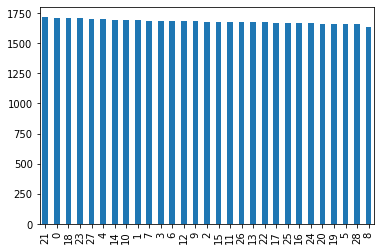

In [ ]:
train_data['label'].value_counts().plot.bar()

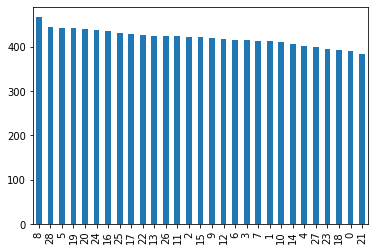

In [ ]:
validate_data['label'].value_counts().plot.bar()

In [ ]:
total_train = train_data.shape[0]
total_validate = validate_data.shape[0]
batch_size=32

# Training Generator

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=15,shear_range=0.1,zoom_range=0.2,horizontal_flip=True,
                                   rescale=1./255,
                                   width_shift_range=0.1,height_shift_range=0.1)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train_data,
    directory="/content/content/asl_alphabets/train",
    x_col='filename',
    y_col='label',
    target_size=(width,height),
    class_mode='raw',
    batch_size=32
)

Found 48720 validated image filenames.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = train_datagen.flow_from_dataframe(
    validate_data,
    directory="/content/content/asl_alphabets/train",
    x_col='filename',
    y_col='label',
    target_size=(width,height),
    class_mode='raw',
    batch_size=32
)

Found 12180 validated image filenames.


# Fit Model

In [ ]:

# FAST_RUN = False

In [ ]:
epochs = 20

history = model.fit(train_generator,epochs=epochs,callbacks=callbacks,validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/20
1522/1522 [==============================] - 531s 349ms/step - loss: 0.3767 - accuracy: 0.8825 - val_loss: 0.2355 - val_accuracy: 0.9239
Epoch 2/20
1522/1522 [==============================] - 520s 341ms/step - loss: 0.3532 - accuracy: 0.8879 - val_loss: 0.1290 - val_accuracy: 0.9573
Epoch 3/20
1522/1522 [==============================] - 526s 345ms/step - loss: 0.3429 - accuracy: 0.8912 - val_loss: 0.1069 - val_accuracy: 0.9654
Epoch 4/20
1522/1522 [==============================] - 530s 348ms/step - loss: 0.3366 - accuracy: 0.8957 - val_loss: 0.9345 - val_accuracy: 0.7404
Epoch 5/20
1522/1522 [==============================] - 514s 338ms/step - loss: 0.3305 - accuracy: 0.8967 - val_loss: 0.1429 - val_accuracy: 0.9510
Epoch 6/20
1522/1522 [==============================] - 507s 333ms/step - loss: 0.3174 - accuracy: 0.9007 - val_loss: 0.1567 - val_accuracy: 0.9460
Epoch 7/20
1522/1522 [==============================] - 514s 338ms/step - loss: 0.3105 - accuracy: 0.9035 - val_

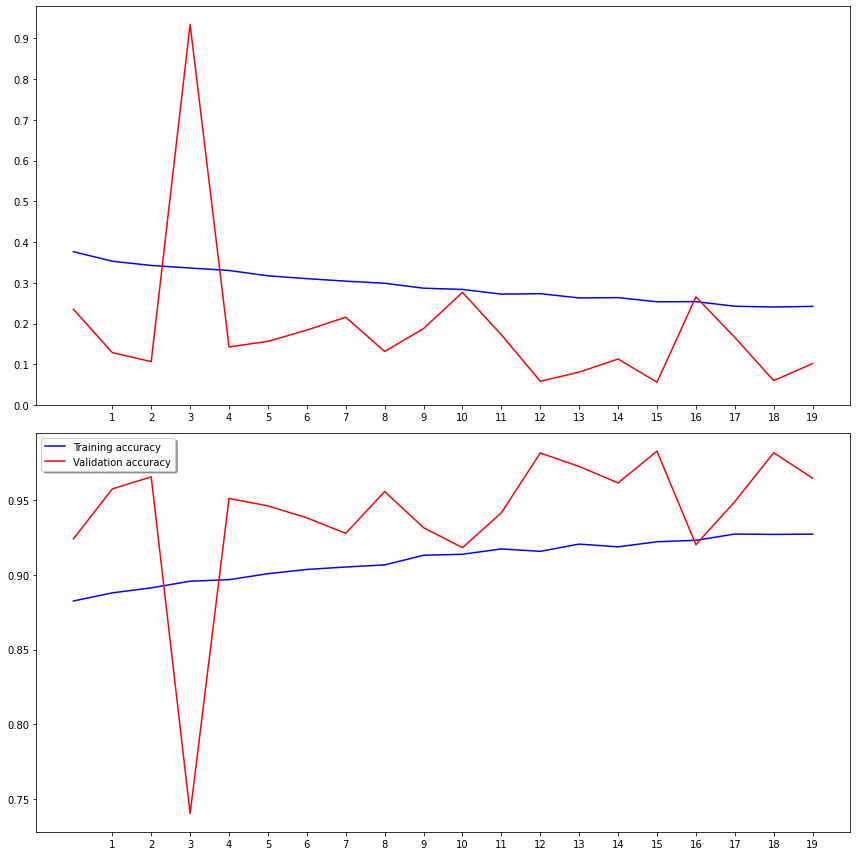

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Test Generator

In [ ]:
test_df = pd.read_csv("/content/content/asl_alphabets/Training_set.csv")
test_df

,filename,label
0,Image_1.jpg,B
1,Image_2.jpg,P
2,Image_3.jpg,J
3,Image_4.jpg,T
4,Image_5.jpg,B
...,...,...
60895,Image_60896.jpg,S
60896,Image_60897.jpg,I
60897,Image_60898.jpg,X
60898,Image_60899.jpg,Q


In [ ]:
test_df['label'] = le.transform(test_df['label'])

In [ ]:
test_df['label']

0         1
1        15
2         9
3        19
4         1
         ..
60895    18
60896     8
60897    23
60898    16
60899    10
Name: label, Length: 60900, dtype: int64

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/content/asl_alphabets/test", 
    x_col='filename',
    y_col='label',
    class_mode='raw',
    target_size=(width,height),
    batch_size=batch_size,
    shuffle=False
)

Found 26100 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 34800 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
nb_samples = test_df.shape[0]

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predict

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([[2.4358544e-06, 2.0512896e-09, 1.2431067e-10, ..., 2.6087165e-11,
        4.7589257e-08, 5.0331629e-15],
       [8.9833776e-08, 1.5992946e-07, 9.1879047e-09, ..., 1.7009072e-10,
        2.8873111e-09, 2.6028324e-09],
       [4.4147440e-05, 3.8205440e-07, 5.5461464e-12, ..., 6.2544108e-09,
        2.6503041e-10, 3.2515896e-10],
       ...,
       [3.6563928e-05, 5.6982316e-07, 5.6198015e-12, ..., 1.5533939e-08,
        1.2081350e-09, 9.3225783e-10],
       [6.5220924e-08, 5.3307030e-09, 8.0829763e-05, ..., 3.0534843e-04,
        7.3657698e-09, 9.9843627e-01],
       [2.8003372e-10, 1.9116354e-10, 9.9999785e-01, ..., 2.2190942e-09,
        1.0270210e-08, 1.4515258e-08]], dtype=float32)

In [ ]:
predictions = np.argmax(predict, axis=-1)

In [ ]:
predictions_target = le.inverse_transform(predictions)

In [ ]:
predictions_target

array(['M', 'G', 'I', ..., 'I', 'space', 'C'], dtype=object)

# Submission

In [ ]:
submission_df = pd.read_csv("/content/content/asl_alphabets/sample submission.csv")
submission_df.head()

,label
0,M
1,M
2,M
3,M
4,M


In [ ]:
submission_df['label'] = predictions_target

In [ ]:
submission_df

,label
0,M
1,G
2,I
3,E
4,D
...,...
26095,V
26096,B
26097,I
26098,space


In [ ]:
submission_df.to_csv("submission02.csv",index=False)